In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import yfinance as yf
import pandas_datareader as pdr

tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "UNH",
           "META","SNA","GS","XOM","NKE","BAX", "MOH","BRK-B", "MSFT"] 

df = yf.download(tickers, datetime(2022, 6, 17), datetime.now())
df = df['Adj Close']
df.tail()


[*********************100%***********************]  17 of 17 completed


,AAPL,AMD,BAX,BRK-B,DPZ,GME,GOOG,GS,META,MOH,MSFT,NFLX,NKE,SNA,SPY,UNH,XOM
Date,,,,,,,,,,,,,,,,,
2023-06-16,184.919998,120.080002,45.360001,338.309998,331.410004,24.559999,124.059998,338.309998,281.000000,278.019989,342.329987,431.959991,113.589996,273.869995,439.459991,458.489990,105.129997
2023-06-20,185.009995,118.930000,44.939999,338.670013,325.540009,24.580000,123.849998,330.720001,284.329987,278.809998,338.049988,434.700012,109.540001,273.019989,437.179993,469.390015,102.720001
2023-06-21,183.960007,112.110001,44.840000,338.609985,323.109985,24.430000,121.260002,325.070007,281.640015,283.000000,333.559998,424.450012,109.980003,272.880005,434.940002,476.750000,103.870003
2023-06-22,187.000000,110.699997,45.250000,336.959991,321.040009,24.320000,123.870003,319.579987,284.880005,287.429993,339.709991,422.480011,110.459999,273.540009,436.510010,479.049988,103.300003
2023-06-23,186.679993,110.010002,45.040001,335.250000,316.820007,23.700001,123.019997,314.709991,288.730011,287.940002,335.019989,424.019989,109.519997,273.619995,433.309998,477.000000,102.400002


In [88]:
from statsmodels.tsa.stattools import adfuller
def stationarity(x, cutoff=0.05):
    pvalue = adfuller(x)[1]
    if pvalue < cutoff:
        print('The pvalue is: ', pvalue, ' is likely stationary')
    else:
        print('The pvalue is: ', pvalue, ' is likely non stationary')

In [53]:
df_corr = df.corr()
df_corr

,AAPL,AMD,BAX,BRK-B,DPZ,GME,GOOG,GS,META,MOH,MSFT,NFLX,NKE,SNA,SPY,UNH,XOM
AAPL,1.000000,0.869542,-0.287811,0.516169,-0.246847,0.141440,0.766250,-0.019710,0.838151,-0.282885,0.908321,0.450468,0.207980,0.565552,0.814711,-0.209283,0.087206
AMD,0.869542,1.000000,-0.318076,0.540265,-0.147349,0.146034,0.804475,-0.052976,0.882647,-0.556356,0.927987,0.455885,0.357160,0.557403,0.832769,-0.383825,0.022582
BAX,-0.287811,-0.318076,1.000000,-0.679169,0.742989,0.791665,0.183121,-0.359595,-0.467495,0.481967,-0.351634,-0.830979,-0.557393,-0.794449,-0.445298,0.635880,-0.778120
BRK-B,0.516169,0.540265,-0.679169,1.000000,-0.362612,-0.481173,0.167868,0.576020,0.568052,-0.399375,0.624622,0.873640,0.623331,0.933793,0.813414,-0.353746,0.732014
DPZ,-0.246847,-0.147349,0.742989,-0.362612,1.000000,0.714715,0.128854,0.051112,-0.417970,0.233640,-0.265750,-0.592567,-0.060188,-0.519820,-0.102201,0.544395,-0.491685
GME,0.141440,0.146034,0.791665,-0.481173,0.714715,1.000000,0.524104,-0.320106,-0.120608,0.255908,0.023075,-0.625759,-0.395680,-0.562721,-0.046498,0.503689,-0.746392
GOOG,0.766250,0.804475,0.183121,0.167868,0.128854,0.524104,1.000000,-0.366138,0.708022,-0.262819,0.796972,0.047115,0.002186,0.138152,0.574945,-0.097536,-0.386422
GS,-0.019710,-0.052976,-0.359595,0.576020,0.051112,-0.320106,-0.366138,1.000000,-0.189239,0.144683,-0.079885,0.510481,0.390209,0.553667,0.404810,0.115686,0.696882
META,0.838151,0.882647,-0.467495,0.568052,-0.417970,-0.120608,0.708022,-0.189239,1.000000,-0.635986,0.937831,0.542039,0.403036,0.625582,0.746116,-0.584040,0.138466
MOH,-0.282885,-0.556356,0.481967,-0.399375,0.233640,0.255908,-0.262819,0.144683,-0.635986,1.000000,-0.483049,-0.349983,-0.567554,-0.409161,-0.384225,0.789837,-0.179406


<h3><li> Select higher correletion stocks </li></h3>

<Axes: >

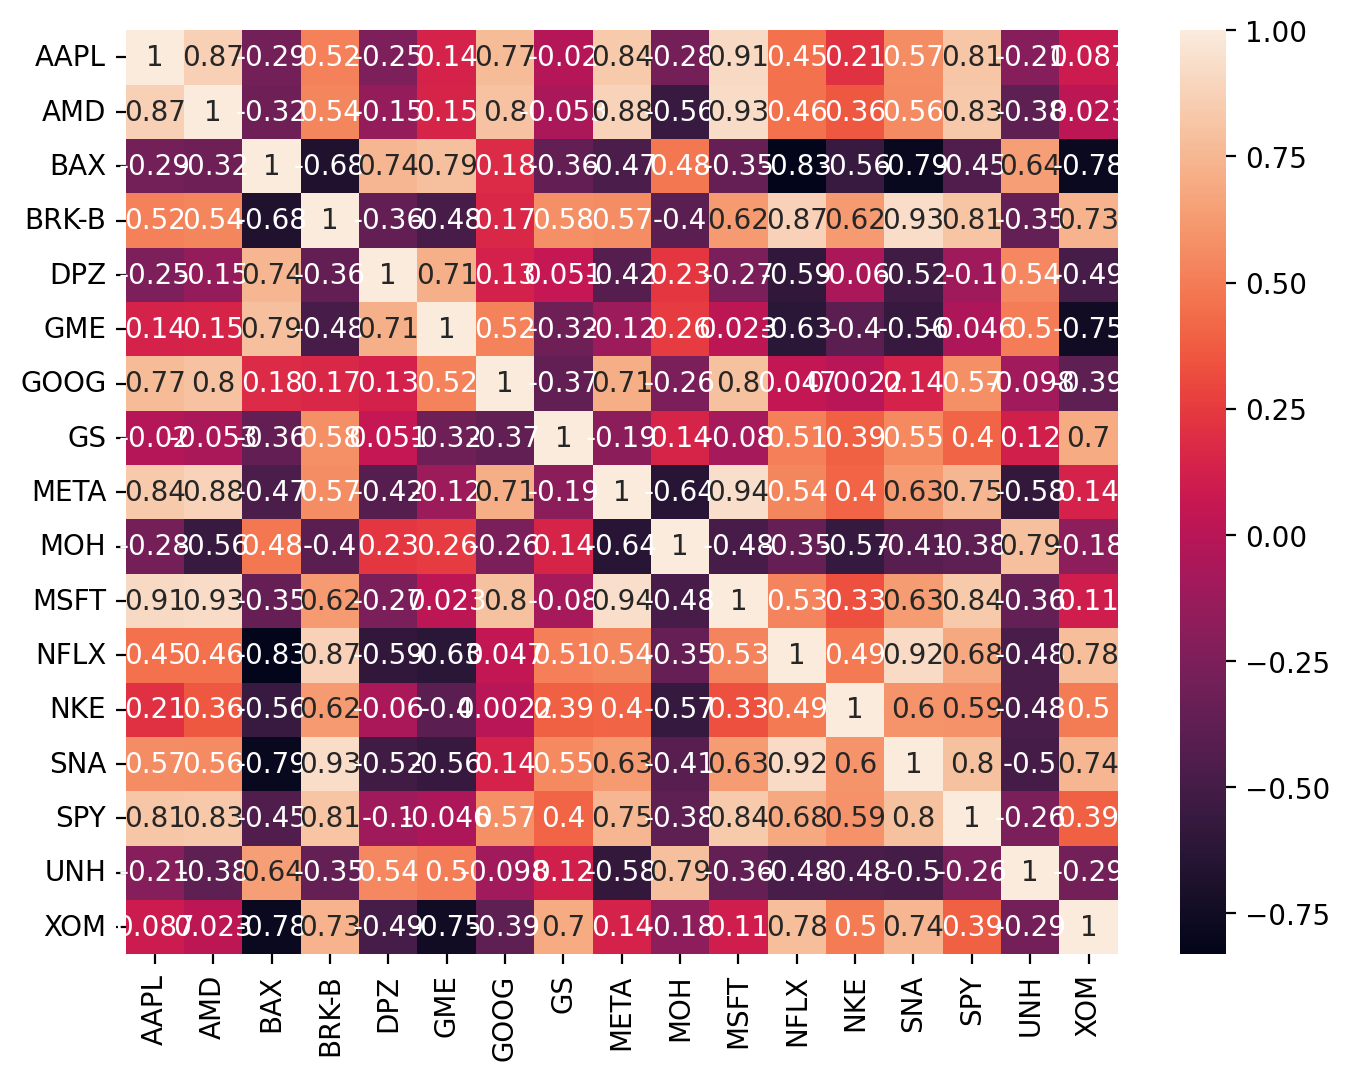

In [54]:
import seaborn as sn

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 200
sn.heatmap( df_corr, annot= True )

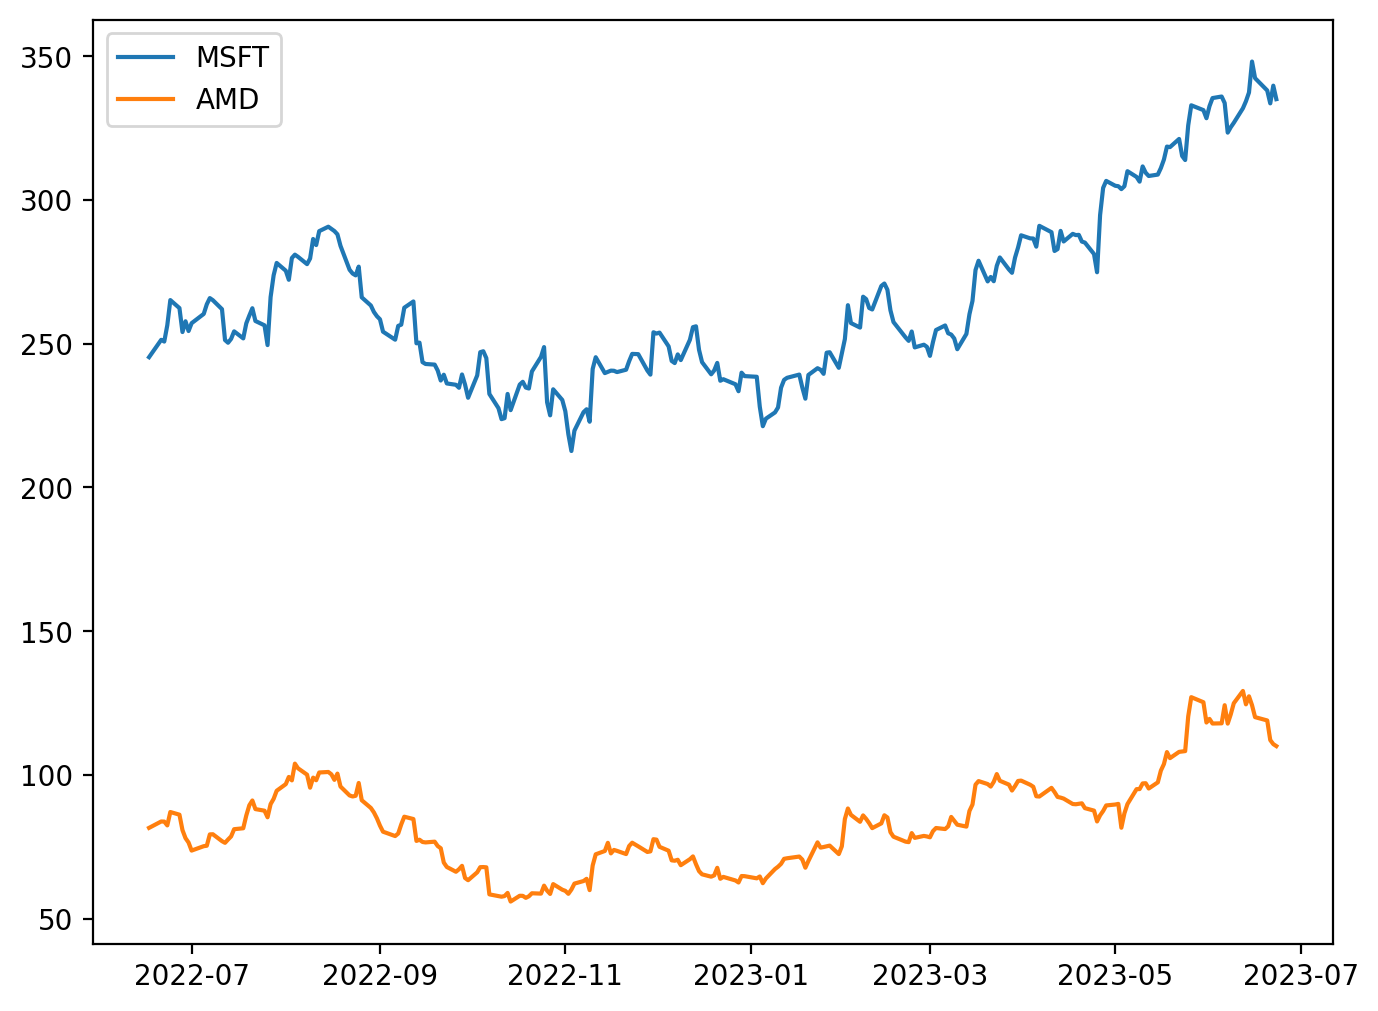

In [55]:
MSFT = df['MSFT']
AMD = df['AMD']
plt.plot(MSFT, label = 'MSFT')
plt.plot(AMD, label = 'AMD')
plt.legend()   

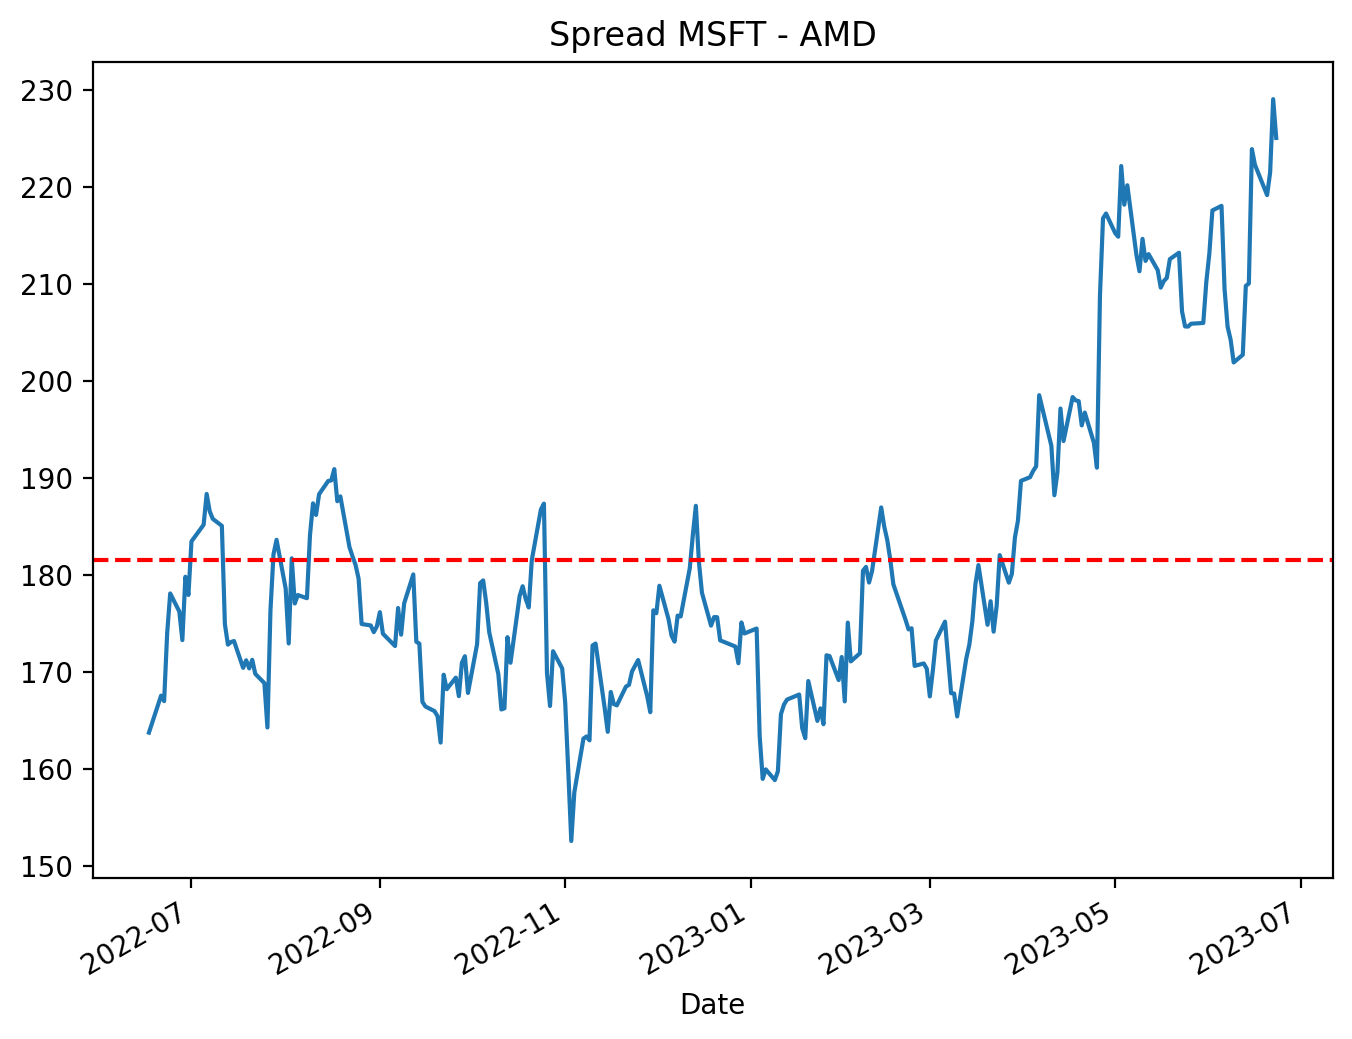

In [56]:
(MSFT - AMD).plot()
plt.title('Spread MSFT - AMD')
plt.axhline((MSFT - AMD).mean(), color='red', linestyle='--')

<h3><li> Not Cointegrated </li></h3>

<h1>Cointegration test</h1>

In [57]:
import statsmodels as sm
from statsmodels.tsa.stattools import coint

coint( MSFT, AMD)

(-2.984857816901399,
 0.11384879508224371,
 array([-3.94007739, -3.36029127, -3.0611898 ]))

In [58]:
score, pvalue, _ = coint( MSFT, AMD)
print (pvalue)


0.11384879508224371


In [59]:
def cointegration(pvalue):

    if pvalue < 0.05:
        print('pvalue is: ', pvalue, 'Likely Cointegrated')    
    else:
        print('pvalue is: ', pvalue, 'Likely not Cointegrated')

In [60]:
cointegration(pvalue)

pvalue is:  0.11384879508224371 Likely not Cointegrated


In [61]:
BRKB = df['BRK-B']
SNA = df['SNA']
AAPL = df['AAPL']
coint(MSFT, AAPL)
score, pvalue, _ = coint(BRKB, SNA)
cointegration(pvalue)


pvalue is:  0.021453576760594513
pvalue is:  0.021453576760594513 Likely Cointegrated


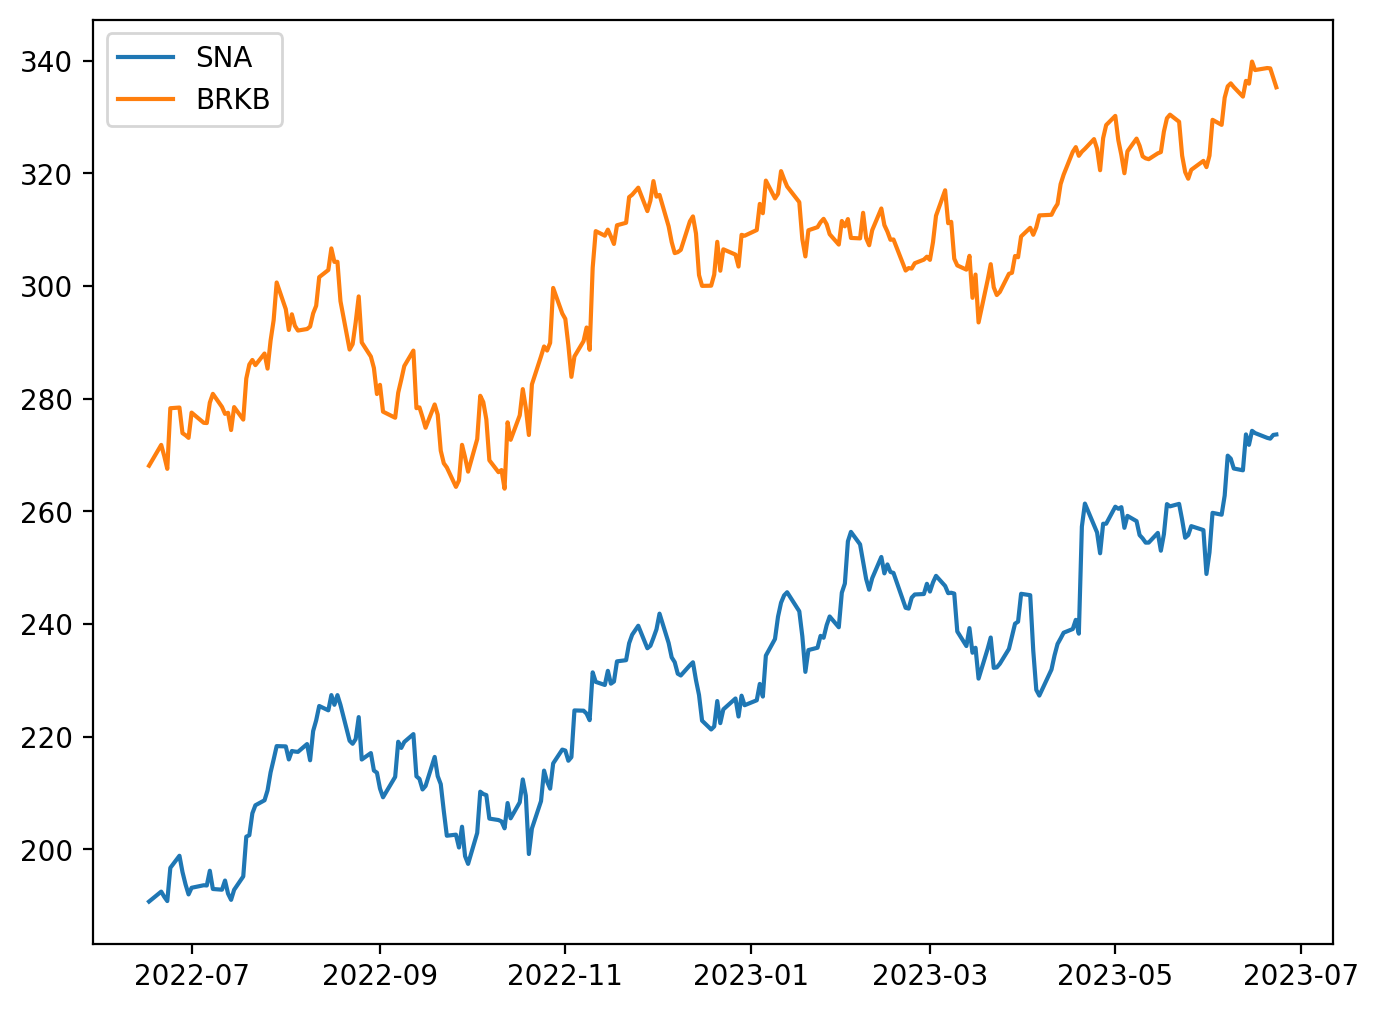

In [62]:
plt.plot(SNA, label = 'SNA')
plt.plot(BRKB, label = 'BRKB')
plt.legend()   

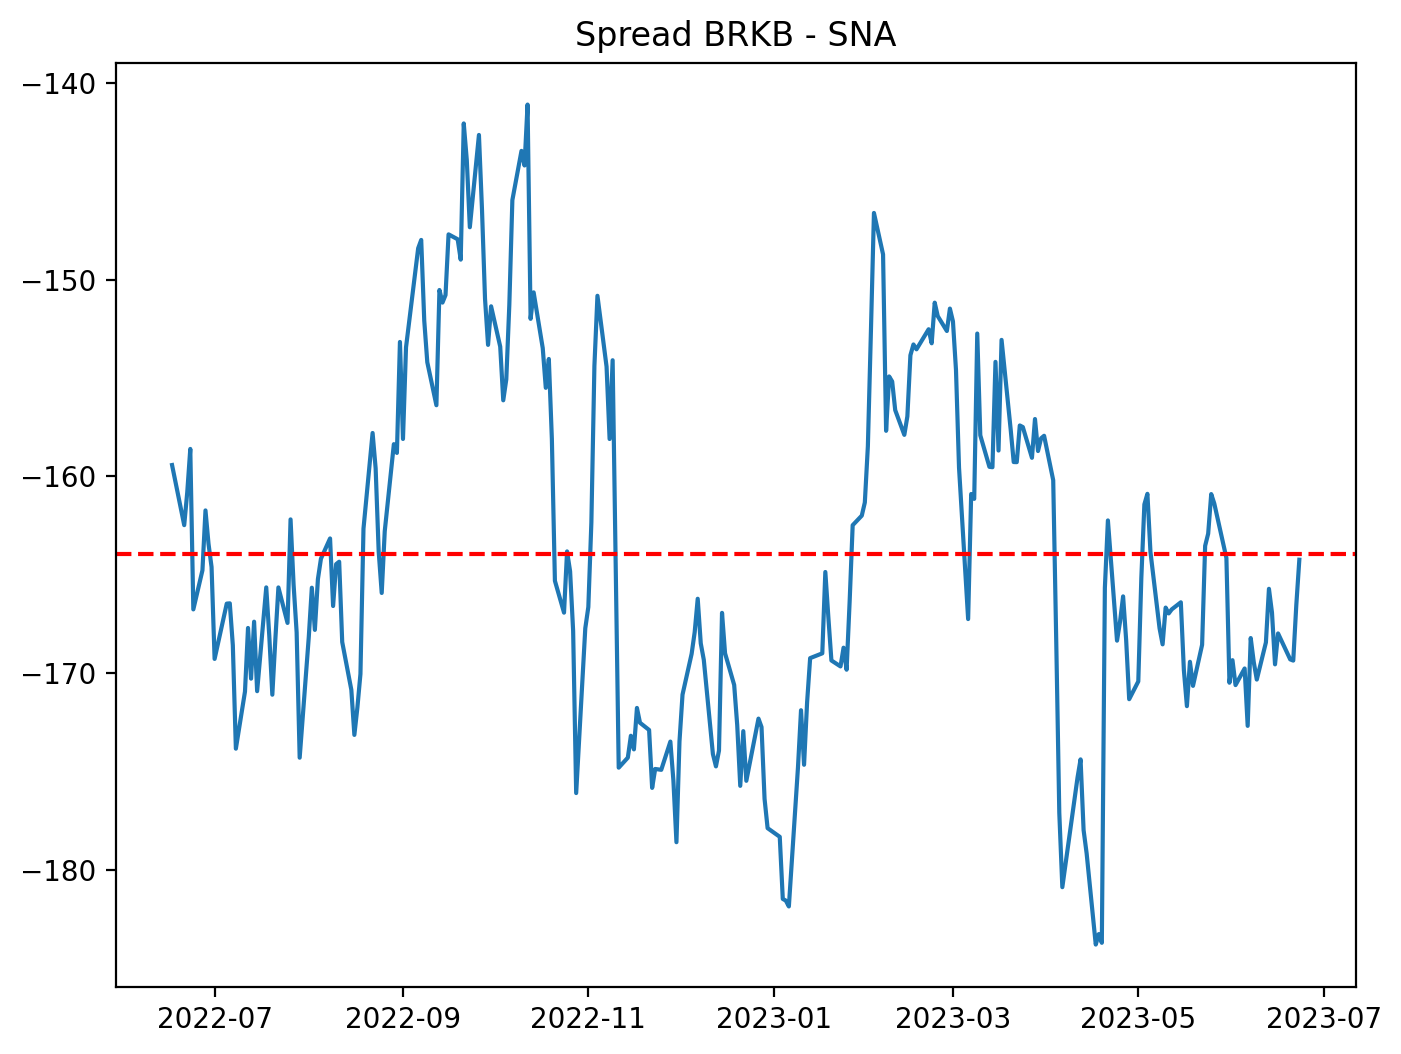

In [74]:
#spread
import statsmodels.api as sm
model = sm.OLS(BRKB,SNA)
result = model.fit()
Beta = result.params
Beta
spread = (SNA - BRKB * 1.306075)
plt.title('Spread BRKB - SNA')
plt.plot(spread)
plt.axhline((SNA - BRKB * 1.306075).mean(), color='red', linestyle='--')


In [90]:
stationarity(spread)
score, pvalue, _ = coint(BRKB, SNA)
cointegration(pvalue)


The pvalue is:  0.012692143787247165  is likely stationary
pvalue is:  0.021453576760594513 Likely Cointegrated


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


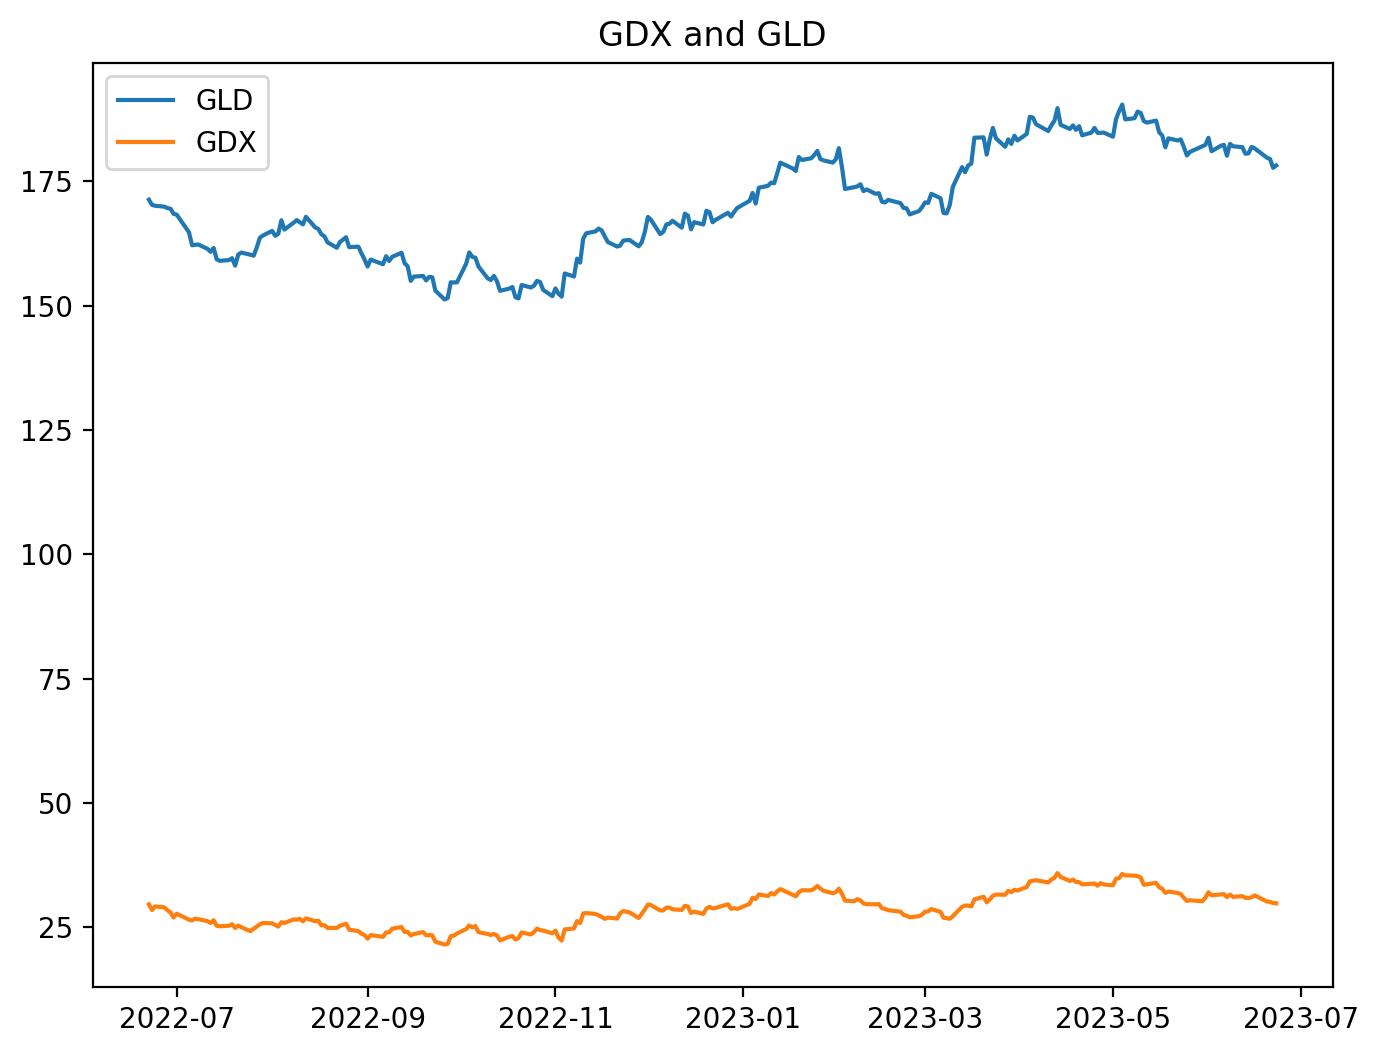

In [65]:
GLD = yf.download('GLD', datetime(2022, 6, 22) , datetime.now())['Adj Close']
GDX = yf.download('GDX', datetime(2022, 6, 22) , datetime.now())['Adj Close']
GoldPair = pd.merge(GLD, GDX, on='Date', suffixes=('_GLD', '_GDX'))
plt.plot(GoldPair)
plt.title('GDX and GLD')
plt.legend(['GLD','GDX'])

In [89]:
model = sm.OLS(GLD,GDX)
results = model.fit()
results.params


SpreadGold = GoldPair['Adj Close_GDX'] - (1.3065202237875695 * GoldPair['Adj Close_GLD'])
SpreadGold
stationarity(SpreadGold)

The pvalue is:  0.675494341155929  is likely non stationary


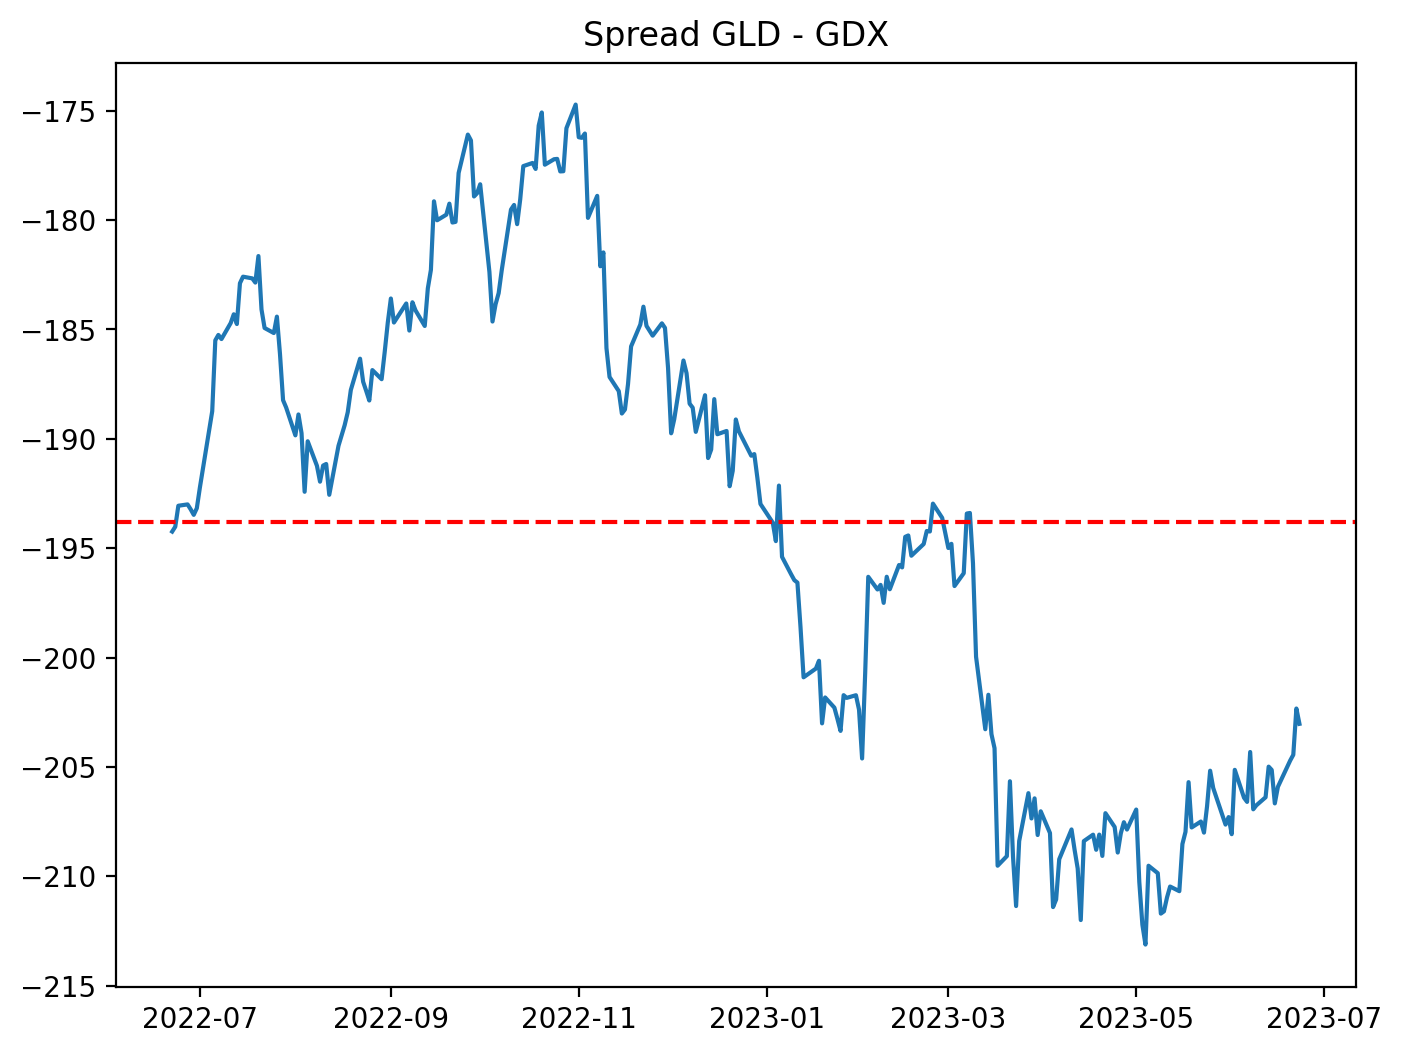

In [80]:
plt.plot(SpreadGold)
plt.title('Spread GLD - GDX')
plt.axhline(SpreadGold.mean(), linestyle='--', color='r')

In [84]:
score, pvalue, _ = coint( GLD, GDX)
cointegration(pvalue)

adf = adfuller(SpreadGold)
print(adf[0])
print(adf[4])


pvalue is:  0.2641370433585891 Likely not Cointegrated
-1.1955796435655075
{'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}


In [85]:
adf = adfuller(spread)
print(adf[0])
print(adf[4])


-3.352412183328869
{'1%': -3.456360306409983, '5%': -2.8729872043802356, '10%': -2.572870232500465}
